>### Assignment: Evaluating Data from a Form
>A client has been testing a [small form](https://github.com/arewadataScience/ArewaDS-Machine-Learning/blob/188276d680e08c162fdb3d948ea890e2370fbd9c/2-Working-With-Data/04-data-preparation/index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the index.html page in a browser to take a look at the form.

>You have been provided a [dataset of csv records](https://github.com/arewadataScience/ArewaDS-Machine-Learning/blob/188276d680e08c162fdb3d948ea890e2370fbd9c/data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](https://github.com/arewadataScience/ArewaDS-Machine-Learning/blob/188276d680e08c162fdb3d948ea890e2370fbd9c/2-Working-With-Data/04-data-preparation/assignment.ipynb).

>### Instructions
>Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information.



In [3]:
# inspecting the form
import pandas as pd

form_df = pd.read_csv('form.csv')
print(form_df)


  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


>Identified problem from the form dataFrame

>### birth_month column
>- abbreviation in some months such as Jan, sept
>- Mixed case inconsistency in January, january

>### state column
>- Missing value appear in the first row NaN
>- Abbreviated values (CA, FL, AK, etc.)
>- Values in full names such as California, Florida

>### pet column
>- inconsistency in plural format of dog instead of dogs.



In [5]:
form_df

,birth_month,state,pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,january,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [ ]:
# working with birth_month
# Converting all values in birth_month to lowercase and strip whitespaces
form_df['birth_month_lowercase'] = form_df['birth_month'].str.lower().str.strip()
form_df['birth_month_lowercase']

0      january
1          jan
2         sept
3      january
4         july
5    september
6        april
7      january
8     november
9     december
Name: birth_month_lowercase, dtype: object

In [11]:
# convert the abbreviation to full spelling
month_non_abbreviated = {
    'jan': 'january',
    'sept': 'september',
    'sep': 'september',
    'dec': 'december',
    'nov': 'november',
    'jul': 'july',
    'apr': 'april'
}
form_df['birth_month_lowercase'] = form_df['birth_month_lowercase'].replace(month_non_abbreviated)
form_df['birth_month_lowercase']

0      january
1      january
2    september
3      january
4         july
5    september
6        april
7      january
8     november
9     december
Name: birth_month_lowercase, dtype: object

In [13]:
# Capitalizing first letter
form_df['birth_month_cleaned'] = form_df['birth_month_lowercase'].str.capitalize()
form_df['birth_month_cleaned']

0      January
1      January
2    September
3      January
4         July
5    September
6        April
7      January
8     November
9     December
Name: birth_month_cleaned, dtype: object

In [14]:
# Inspecting the results
print(form_df['birth_month_cleaned'].value_counts())

birth_month_cleaned
January      4
September    2
July         1
April        1
November     1
December     1
Name: count, dtype: int64


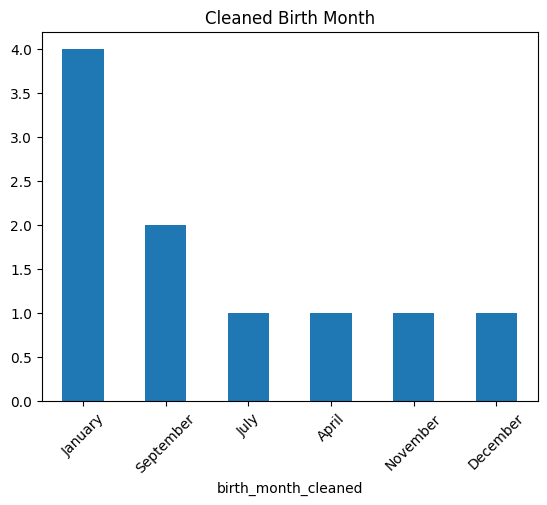

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# plotting the result
form_df['birth_month_cleaned'].value_counts().plot(kind='bar')
plt.title("Cleaned Birth Month")
plt.xticks(rotation=45)
plt.show()


In [17]:
form_df.columns

Index(['birth_month', 'state', 'pet', 'birth_month_cleaned',
       'birth_month_lowercase'],
      dtype='object')

In [18]:
form_df['state']

0           NaN
1            CA
2        Hawaii
3            AK
4            RI
5    California
6            CA
7    California
8            FL
9       Florida
Name: state, dtype: object

In [19]:
# cleaning state column
# Converting all the values to uppercase
form_df['state_uppercase'] = form_df['state'].str.upper().str.strip()
form_df['state_uppercase']

0           NaN
1            CA
2        HAWAII
3            AK
4            RI
5    CALIFORNIA
6            CA
7    CALIFORNIA
8            FL
9       FLORIDA
Name: state_uppercase, dtype: object

In [ ]:
# changing full state names with abbreviations
state_abbreviations = {
    'CALIFORNIA': 'CA',
    'FLORIDA': 'FL',
    'HAWAII': 'HI'
}

form_df['state_cleaned'] = form_df['state_uppercase'].replace(state_abbreviations)
form_df['state_cleaned']

0    NaN
1     CA
2     HI
3     AK
4     RI
5     CA
6     CA
7     CA
8     FL
9     FL
Name: state_cleaned, dtype: object

In [21]:
# inspecting the state column
print(form_df['state_cleaned'].value_counts())

state_cleaned
CA    4
FL    2
HI    1
AK    1
RI    1
Name: count, dtype: int64


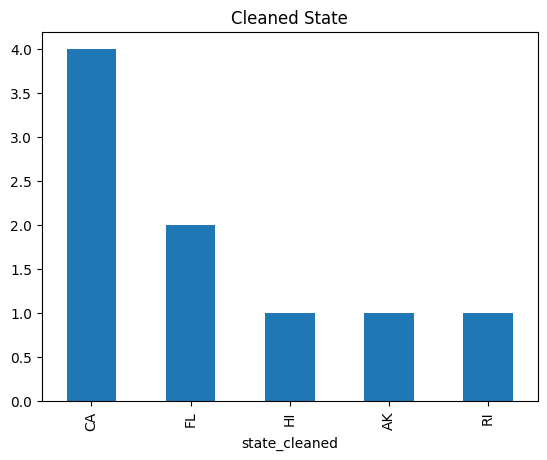

In [22]:
# plotting the state variables
form_df['state_cleaned'].value_counts().plot(kind='bar')
plt.title("Cleaned State")
plt.show()


In [ ]:
# cleaning pet column
# conveting all values to capitalize format
form_df['pet_cleaned'] = form_df['pet'].str.capitalize().str.strip()
form_df['pet_cleaned']

0    Cats
1    Cats
2     Dog
3     Dog
4    Cats
5    Cats
6     Dog
7    Cats
8     Dog
9    Cats
Name: pet_cleaned, dtype: object

In [25]:
# inspecting the pet column
print(form_df['pet_cleaned'].value_counts())

pet_cleaned
Cats    6
Dog     4
Name: count, dtype: int64


In [26]:
# converting the values to lowercase and making some necessary replacement
form_df['pet'] = form_df['pet'].str.strip().str.lower()

# Replace plural consistently
form_df['pet'] = form_df['pet'].replace({'dog': 'Dogs', 'cat': 'Cats'})
form_df['pet']

0    cats
1    cats
2    Dogs
3    Dogs
4    cats
5    cats
6    Dogs
7    cats
8    Dogs
9    cats
Name: pet, dtype: object

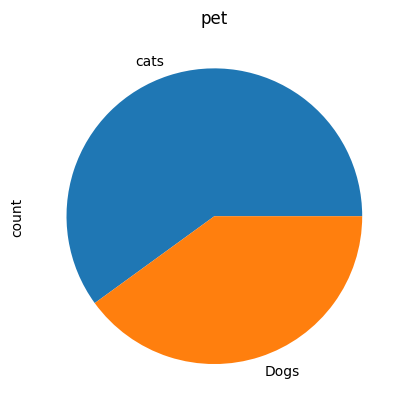

In [27]:
# visualizing pet
form_df['pet'].value_counts().plot(kind='pie')
plt.title("pet")
plt.show()
